# Tarea 14

In [6]:
using PyPlot;
plt = PyPlot;
using SymPy;

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [7]:
function metodo_RK4_2(f,g,CI,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x=CI[1]
    u=CI[2]
    Sx = []
    Su = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        m1 = f(x,u,i)
        k1 = g(x,u,i)
        m2 = f(x+ (h/2.)*m1,u+ (h/2.)*k1, i+h/2.)
        k2 = g(x+ (h/2.)*m1,u+ (h/2.)*k1, i+h/2.)
        m3 = f(x+ (h/2.)*m2,u+ (h/2.)*k2, i+h/2.)
        k3 = g(x+ (h/2.)*m2,u+ (h/2.)*k2, i+h/2.)
        m4 = f(x+ h*m3,u+ h*k3, i+h)
        k4 = g(x+ h*m3,u+ h*k3, i+h)
        
        x = x + (h/6.)*(m1 + 2.*m2 + 2.*m3 + m4)
        u = u + (h/6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        push!(Sx,x)
        push!(Su,u)
    end
    listh, Sx, Su
end

metodo_RK4_2 (generic function with 1 method)

In [37]:
rB = rand(15)
B = -0.3*rB
C = -B
D = []
for i in B
    push!(D,i)
end
for i in C
    push!(D,i)
end

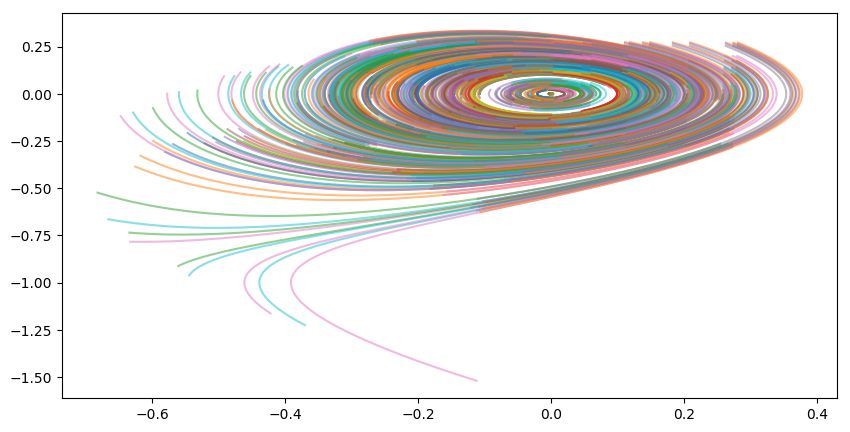

In [43]:
plt.figure(figsize=(10,5))
for j in D
    for i in D
        R1,R2,R3=metodo_RK4_2((x,u,i)->u-u^3, (x,u,i)->-x-u^2, (j,i), linspace(-1.3,1.3,150))
        plt.plot(R2,R3,alpha=0.5)
        #plt.xlim((0,1))
        #plt.ylim((-5,5))
    end
end

El Jacobiano de $\vec{F} = (y-y^3,-x-y^2)^T$ es 
\begin{equation}
J_F =  \left( \begin{array}{cc}
0 & 1-3y^2  \\
-1 & -2y  \end{array} \right)
\end{equation}

Al evaluarlo en $(x,y) = (0,0)$ se obtiene la siguiente matriz

\begin{equation}
A = \left( \begin{array}{cc}
0 & 1  \\
-1 & 0  \end{array} \right)
\end{equation}

Donde su determinante es $\Delta = 1$ y su traza es $\tau = 0$. Por ello, comparando con el diagrama de Strogratz, se obtiene que localmente el punto fijo es un centro.

__Ejercicio2:__ Usar Runge-Kutta orden 4 para resolver el oscilador de van del Pol:

\begin{equation}
\frac{d^2 x}{d t^2} - \mu (1-x^2) {dx \over dt} + x = 0
\end{equation}

* Graficar muchas trayectorias, construídas a partir de condiciones iniciales aleatorias, en el espacio fase. Observa alguna estructura en particular?
* Usen $\mu = 0.5$
* Grafiquen varias trayectorias en los espacios $(x,y)$ y $(y = \dot x,t)$

In [101]:
rB1 = rand(15)
B1 = -5.5*rB1
C1 = -B1
D1 = []
for i in B1
    push!(D1,i)
end
for i in C1
    push!(D1,i)
end

rB2 = rand(3)
B2 = -5.5*rB2
C2 = -B2
D2 = []
for i in B2
    push!(D2,i)
end
for i in C2
    push!(D2,i)
end

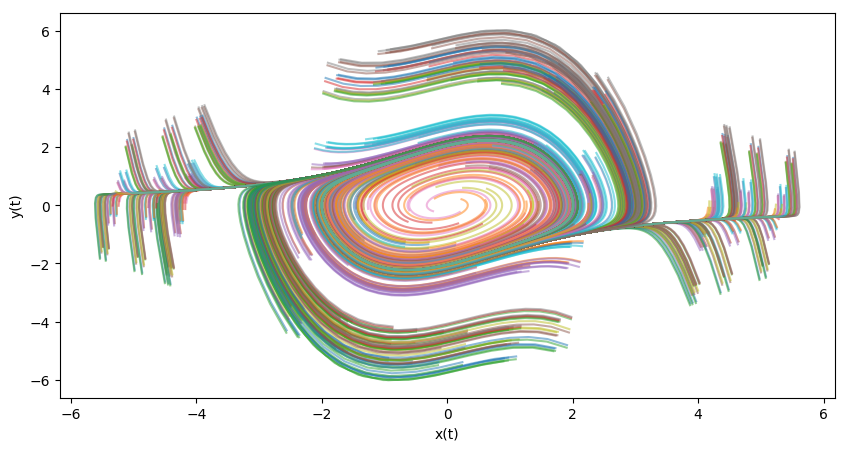

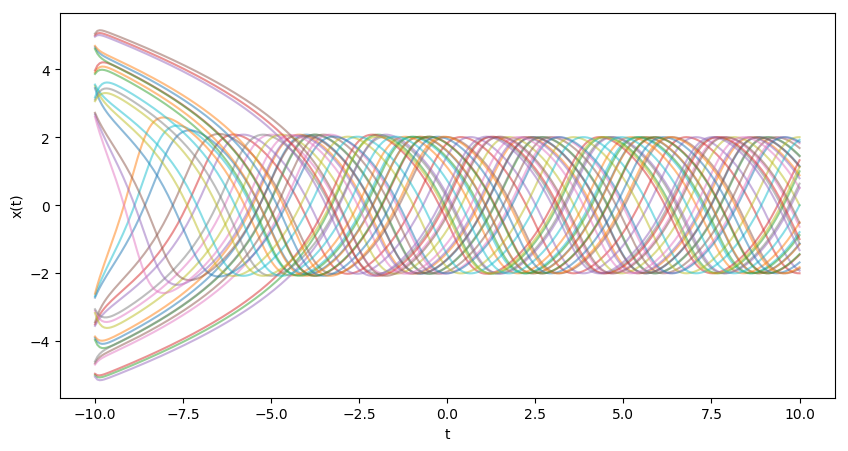

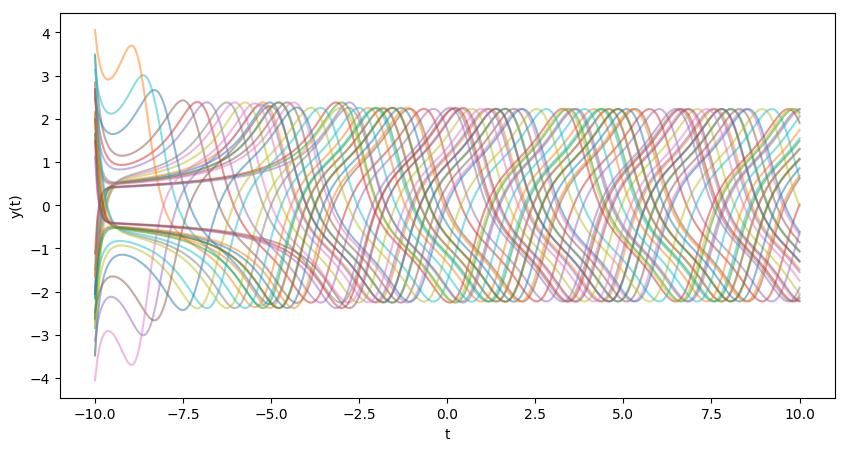

In [102]:
mu = 0.5
plt.figure(figsize=(10,5))
for j in D1
    for i in D1
        R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->mu*(1-x^2)u - x, (j,i), linspace(-10,10,300))
        plt.plot(R2,R3,alpha=0.5)
        plt.xlabel("x(t)")
        plt.ylabel("y(t)")
        #plt.xlim((0,1))
        #plt.ylim((-5,5))
    end
end
plt.figure(figsize=(10,5))
for j in D2
    for i in D2
        R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->mu*(1-x^2)u - x, (j,i), linspace(-10,10,300))
        plt.plot(R1,R2,alpha=0.5)
        plt.xlabel("t")
        plt.ylabel("x(t)")
        #plt.xlim((0,1))
        #plt.ylim((-5,5))
    end
end
plt.figure(figsize=(10,5))
for j in D2
    for i in D2
        R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->mu*(1-x^2)u - x, (j,i), linspace(-10,10,300))
        plt.plot(R1,R3,alpha=0.5)
        plt.xlabel("t")
        plt.ylabel("y(t)")
        #plt.xlim((0,1))
        #plt.ylim((-5,5))
    end
end